In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_name = "/content/drive/MyDrive/Github/csv_files/final_all_songs.csv"

In [ ]:
import pandas as pd
final_all_songs = pd.read_csv(file_name, encoding='utf-8')

In [ ]:
final_all_songs

,SongID,Title,Rank,Singer,Album,Likes,ReleaseDate,Genre,CommentsCount,Lyrics,AlbumImageURL,Composers,Lyricists,Arrangers,NewTag
0,69908,당돌한 여자,13.0,서주경,당돌한 여자,2494,1996,성인가요/트로트,5,일부러 안 웃는거 맞죠 아하\n나에게만 차가운거 맞죠 아하\n알아요 그대 마음을 내...,https://cdnimg.melon.co.kr/cm/album/images/000...,임강현,강은경,임강현,"['#전집', '#막걸리', '#소주', '#매장음악추천', '#대학로', '#매장..."
1,73294,백만송이 장미,15.0,심수봉,Original Golden Best,9740,1997.02.01,성인가요/트로트,29,먼엣날 어느별에서 내다시 세상에 나올때 \n사랑을 주고 오라는 작은 음성 하나 들었...,https://cdnimg.melon.co.kr/cm/album/images/000...,외국곡,심수봉,NaN,"['#전집', '#막걸리', '#소주', '#매장음악추천', '#대학로', '#매장..."
2,188668,안녕,14.0,김창완,산울림 김창완의 새로운 여행,2936,1994.10.12,"포크/블루스, 국내드라마",18,안녕 귀여운 내 친구야\n멀리 뱃고동이 울리면\n네가 울어주렴\n아무도 모~르게\n...,https://cdnimg.melon.co.kr/cm/album/images/000...,김창완,김창완,NaN,"['#새벽', '#휴식', '#힐링', '#편안한', '#밤', '#LP', '#잠..."
3,517091,Rush (Feat. 정인),9.0,리쌍,"Leessang, Special Jungin",11768,2004.03.05,랩/힙합,35,지나간 날은 모두 뒤로 뒤로 \n\n다가올 날을 향해 Hi-Lo Hi-Lo\n\n준...,https://cdnimg.melon.co.kr/cm/album/images/000...,길,개리,NaN,"['#감성적인', '#스트레스', '#감성', '#열정', '#감성힙합', '#도전..."
4,742574,무조건,14.0,박상철,박상철 3집 (무조건/바라보는 사랑/자옥아),6627,2005.04.07,성인가요/트로트,18,내가 필요할 때 나를 불러줘 \n언제든지 달려갈게 \n낮에도 좋아 밤에도 좋아 \n...,https://cdnimg.melon.co.kr/cm/album/images/003...,박현진,한솔,NaN,"['#전집', '#막걸리', '#소주', '#매장음악추천', '#대학로', '#매장..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,36799775,Heart,2.0,던 (DAWN),Narcissus (나르시스),820,2023.09.15,댄스,11,오늘도 네가 없는 밤에\n널 닮은 누군가를 또 찾네\nI’m still gettin...,https://cdnimg.melon.co.kr/cm2/album/images/11...,"LEEZ, 그루비룸 (GroovyRoom), 과카(Kwaca), 던 (DAWN)","던 (DAWN), 과카(Kwaca), 그루비룸 (GroovyRoom)","LEEZ, 그루비룸 (GroovyRoom), GONEISBACK","['#새벽', '#도입부', '#감성', '#알앤비', '#기분전환', '#밤', ..."
182,36801619,Back for More (TXT Ver.),3.0,투모로우바이투게더,Back for More (More Edition),4052,2023.09.18,댄스,58,I can see you coming back for more\nComing bac...,https://cdnimg.melon.co.kr/cm2/album/images/11...,"Ryan Tedder, Tyler Spry, Slow Rabbit","Ryan Tedder, Tyler Spry, Slow Rabbit",NaN,"['#내취향', '#띵곡', '#노래방', '#기분전환', '#중독성', '#신나는..."
183,36805679,Vancouver 2,6.0,BIG Naughty (서동현),Vancouver 2,26837,2023.09.19,록/메탈,307,Hey girl it was 9 years\n네가 없는 매일 밤 was a nigh...,https://cdnimg.melon.co.kr/cm2/album/images/11...,"dress, BIG Naughty (서동현)",BIG Naughty (서동현),"dress, BIG Naughty (서동현)",['#명곡']
184,36821415,Galileo,4.0,Kep1er (케플러),Magic Hour,1968,2023.09.25,댄스,70,Galileo Galileo leo leo\nGalileo Galileo leo l...,https://cdnimg.melon.co.kr/cm2/album/images/11...,"Yejune Synn (SNNNY), Josh Fountain, Lauren Aqu...",서지음,"SNNNY, Josh Fountain","['#내취향', '#띵곡', '#노래방', '#기분전환', '#중독성', '#신나는..."


In [ ]:
def data_cleansing(playlist):
  # 작곡가가 null이면 가수로 채우기
  playlist['Composers'].fillna(playlist['Singer'], inplace=True)

  # 작사가가 null이면 작곡가로 채우기
  playlist['Lyricists'].fillna(playlist['Composers'], inplace=True)

  # 편곡가가 null이면 작곡가로 채우기
  playlist['Arrangers'].fillna(playlist['Composers'], inplace=True)

# null이면 그대로 두는 것도 괜찮을듯

def create_song_sentence(playlist):
  # Transforming the user's playlist in the same way
  playlist['song_sentence'] = playlist['Singer'].astype(str) + " " + \
                         playlist['Genre'].astype(str) + " " + \
                         playlist['ReleaseDate'].astype(str) + " " + \
                         playlist['Composers'].astype(str) + " " + \
                         playlist['Lyricists'].astype(str) + " " + \
                         playlist['Arrangers'].astype(str)

In [ ]:
# 작곡가가 null이면 가수로 채우기
data_cleansing(final_all_songs)

In [ ]:
num_nulls_in_composers = final_all_songs['Composers'].isnull().sum()
print(f"작곡가 null 값 확인: {num_nulls_in_composers}")
num_nulls_in_lyricists = final_all_songs['Lyricists'].isnull().sum()
print(f"작사가 null 값 확인: {num_nulls_in_lyricists}")
num_nulls_in_arrangers = final_all_songs['Arrangers'].isnull().sum()
print(f"편곡가 null 값 확인: {num_nulls_in_arrangers}")

작곡가 null 값 확인: 0
작사가 null 값 확인: 0
편곡가 null 값 확인: 0


In [ ]:
create_song_sentence(final_all_songs)

In [ ]:
final_all_songs[['Title', 'song_sentence']].tail()

,Title,song_sentence
181,Heart,"던 (DAWN) 댄스 2023.09.15 LEEZ, 그루비룸 (GroovyRoom)..."
182,Back for More (TXT Ver.),"투모로우바이투게더 댄스 2023.09.18 Ryan Tedder, Tyler Spr..."
183,Vancouver 2,"BIG Naughty (서동현) 록/메탈 2023.09.19 dress, BIG N..."
184,Galileo,Kep1er (케플러) 댄스 2023.09.25 Yejune Synn (SNNNY)...
185,Either Way,"IVE (아이브) R&B/Soul 2023.09.25 라이언 전, Luke Fitt..."


In [ ]:
# Create list of 'sentences' for Word2Vec training
sentences = final_all_songs['song_sentence'].str.split().tolist()

embedding_size = 100 # 100차원
window_size = 5 # 앞 뒤로 5개
min_count = 1 # 최소 빈도수
workers = 4 #  4개의 CPU 코어

epochs = 20
num_negatives = 100

# 모델 초기화
model = Word2Vec(sentences,
                 vector_size=embedding_size,
                 window=window_size,
                 min_count=min_count,
                 workers=workers,
                 sg=1,  # skip-gram 방식
                 negative=num_negatives  # 네거티브 샘플링
                 )
# 모델 학습
model.train(sentences, total_examples=model.corpus_count, epochs=epochs)


(42763, 46000)

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reload all the playlist data
playlist_files = [
    "/content/drive/MyDrive/Github/playlist/playlist_1.csv",
    "/content/drive/MyDrive/Github/playlist/playlist_2.csv",
    "/content/drive/MyDrive/Github/playlist/playlist_3.csv",
    "/content/drive/MyDrive/Github/playlist/playlist_4.csv",
    "/content/drive/MyDrive/Github/playlist/playlist_5.csv",
    "/content/drive/MyDrive/Github/playlist/playlist_6.csv",
    "/content/drive/MyDrive/Github/playlist/playlist_7.csv",
    "/content/drive/MyDrive/Github/playlist/playlist_8.csv",
    "/content/drive/MyDrive/Github/playlist/playlist_9.csv",
    "/content/drive/MyDrive/Github/playlist/playlist_10.csv"
    ]

playlists = [pd.read_csv(file) for file in playlist_files]

In [ ]:
for playlist in playlists:
  data_cleansing(playlist)
  create_song_sentence(playlist)

In [ ]:
from sklearn.model_selection import train_test_split

train_playlists = []
test_playlists = []

# Split each playlist into train (80%) and test (20%) sets
for playlist in playlists:
    train, test = train_test_split(playlist, test_size=0.2, random_state=42)
    train_playlists.append(train)
    test_playlists.append(test)

# Check the number of songs in the first training playlist
len(train_playlists[0]), len(test_playlists[0])


(19, 5)

In [ ]:
# Creating a function to vectorize a song
def vectorize_song(song_id):
    info = final_all_songs[final_all_songs['SongID'] == song_id]['song_sentence'].iloc[0].split()
    vec = np.mean([model.wv[word] for word in info if word in model.wv.index_to_key], axis=0)
    return vec

In [ ]:
def recommend_songs_for_playlist(playlist_train, model, num_recommendations=20):
    """Recommend songs for a given playlist using the trained Word2Vec model."""

    # Vectorizing the songs in the user's playlist
    playlist_song_vectors = np.array([vectorize_song(song) for song in playlist_train['SongID']])

    # Taking the mean of vectors in the user's playlist to get a centroid vector
    centroid_vector = np.mean(playlist_song_vectors, axis=0).reshape(1, -1)

    # Calculating cosine similarities of all songs to the centroid vector
    song_ids = final_all_songs['SongID'].tolist()
    song_vectors = np.array([vectorize_song(song_id) for song_id in song_ids])
    similarities = cosine_similarity(centroid_vector, song_vectors)

    # Getting the top recommended songs
    recommended_song_indices = similarities[0].argsort()[-num_recommendations:][::-1]
    recommended_songs = final_all_songs.iloc[recommended_song_indices]

    # Exclude songs that are already in the user's playlist
    exclude_song_ids = playlist_train['SongID'].tolist()
    recommended_songs = recommended_songs[~recommended_songs['SongID'].isin(exclude_song_ids)]

    # If excluding songs from the original recommendation leaves us with less than the desired number,
    # we fetch more recommendations.
    if len(recommended_songs) < num_recommendations:
        more_recommendations = num_recommendations - len(recommended_songs)
        next_best_song_indices = [idx for idx in similarities[0].argsort() if idx not in recommended_song_indices][:more_recommendations]
        more_recommended_songs = final_all_songs.iloc[next_best_song_indices]
        more_recommended_songs = more_recommended_songs[~more_recommended_songs['SongID'].isin(exclude_song_ids)]
        recommended_songs = pd.concat([recommended_songs, more_recommended_songs])


    return recommended_songs[:num_recommendations]

In [ ]:
# Retry the recommendation for the first playlist
recommended_for_playlist_1 = recommend_songs_for_playlist(train_playlists[0], model)

recommended_for_playlist_1[['SongID', 'Title', 'Singer', 'Genre']]

,SongID,Title,Singer,Genre
3,517091,Rush (Feat. 정인),리쌍,랩/힙합
38,31391180,How I Feel,PARCO (파르코),R&B/Soul
34,31297008,Dank,박재범,R&B/Soul
28,30732377,Boat,죠지,R&B/Soul
33,31184764,Slow,SOLE (쏠),R&B/Soul
32,31098679,OSAKA (Feat. ZICO),ELO,R&B/Soul
54,32243272,Bunny,백예린 (Yerin Baek),R&B/Soul
116,34701954,보라색 선,BRAINOFF,"랩/힙합, 인디음악"
27,30707718,RIDE (Feat. THAMA),SOLE (쏠),R&B/Soul
37,31376041,Make Up (Feat. Crush),샘김 (Sam Kim),R&B/Soul


In [ ]:
import numpy as np

# 숨겨진 곡들과 추천된 곡들을 기반으로 NDCG를 계산
def compute_ndcg(recommended_items, hidden_items):
    dcg = 0.0
    idcg = 0.0
    for i, rec_item in enumerate(recommended_items):
        if rec_item in hidden_items:
            dcg += 1.0 / np.log2(i + 2)
    for i in range(len(hidden_items)):
        idcg += 1.0 / np.log2(i + 2)
    return dcg / idcg

hidden_items = test_playlists[0]['SongID'].tolist()
recommended_items = recommended_for_playlist_1['SongID'].tolist()
ndcg_score = compute_ndcg(recommended_items, hidden_items)
print(ndcg_score)


0.3391602052736161


In [ ]:
test_playlists[0][['SongID', 'Title', 'Singer', 'Genre']]

,SongID,Title,Singer,Genre
8,517091,Rush (Feat. 정인),리쌍,랩/힙합
16,32874182,It's me !,원슈타인,랩/힙합
0,33115807,"내일이 오면 (Feat. 기리보이, BIG Naughty (서동현))",릴보이 (lIlBOI),랩/힙합
18,33388143,"시한부 (Feat. Leellamarz, 로꼬)",TOIL,랩/힙합
11,32885942,비행,E SENS,랩/힙합


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


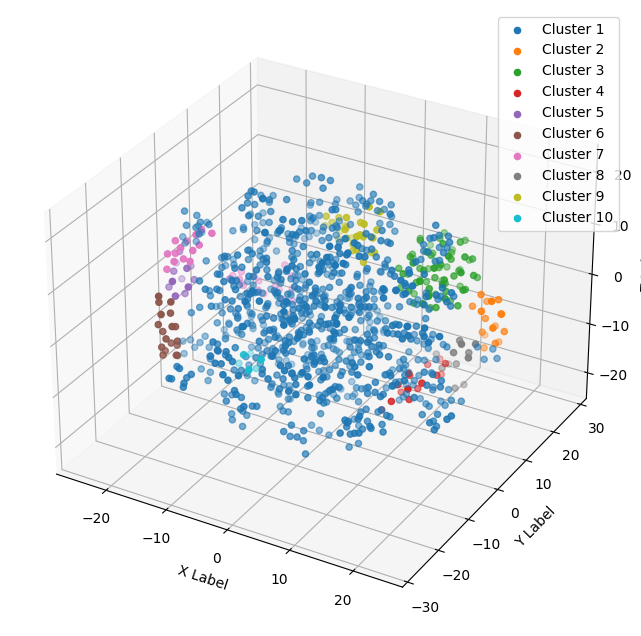

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# 임베딩 가져오기
embedding_matrix = model.wv.vectors


# K-means 군집화
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embedding_matrix)
labels = kmeans.labels_

# t-SNE로 3D 차원 축소
tsne = TSNE(n_components=3, perplexity=80, learning_rate=10, n_iter=2000)
reduced = tsne.fit_transform(embedding_matrix)

# 3D 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_clusters):
    ax.scatter(reduced[labels == i][:, 0], reduced[labels == i][:, 1], reduced[labels == i][:, 2], label=f'Cluster {i + 1}')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend()

plt.show()





In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=3de051b3e38469d3fcef4e9060ebcb2c9795a38bf30ba88586ad7d335f5dfe13
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=993c72b4a7c51b32aee4f04b0277bbd250804b2a9eb4cf3a884d867a4bad9650
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


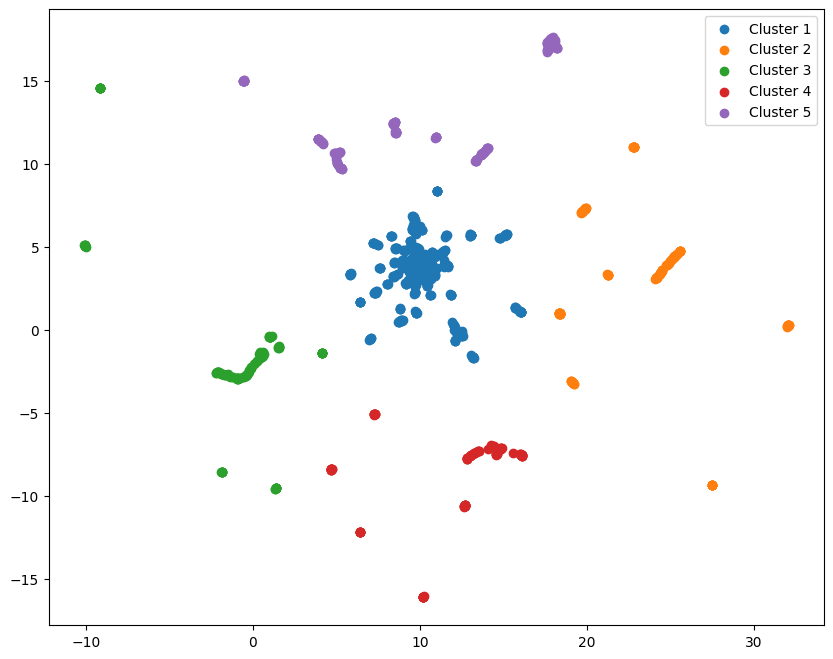

In [ ]:
from sklearn.preprocessing import StandardScaler
from umap import UMAP

# 데이터 정규화
scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(embedding_matrix)

# UMAP으로 차원 축소
umap = UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
reduced = umap.fit_transform(scaled_embeddings)

# K-means 군집화
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(reduced)
labels = kmeans.labels_

# 시각화
plt.figure(figsize=(10, 8))
for i in range(n_clusters):
    plt.scatter(reduced[labels == i][:, 0], reduced[labels == i][:, 1], label=f'Cluster {i + 1}')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# 각 군집의 크기 확인
unique_labels, counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label + 1}: {count} songs")


Cluster 1: 489 songs
Cluster 2: 134 songs
Cluster 3: 125 songs
Cluster 4: 119 songs
Cluster 5: 185 songs
